<a href="https://www.kaggle.com/code/amirmotefaker/flipkart-reviews-sentiment-analysis?scriptVersionId=154550891" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introduction

- [Flipkart](https://www.flipkart.com/) is one of the most popular Indian companies. 

- India's biggest online store for Mobiles, Fashion (Clothes/Shoes), Electronics, Home Appliances, Books, Home, Furniture, Grocery, Jewelry, Sporting goods,...

- It is an e-commerce platform that competes with popular e-commerce platforms like [Amazon.](https://www.amazon.com/) 

- One of the most popular use cases of data science is the task of sentiment analysis of product reviews sold on e-commerce platforms.

# 10 ways to increase your sales on Flipkart

1. Product Listing Ads
2. Participate in spike sales
3. Good packaging
4. Better cataloging
5. Stick to the rules
6. Stock up your inventory
7. Deliver on time
8. Images
9. Become a Flipkart Advantage seller
10. Keep customer delight a priority

Ref: [flipkart](https://seller.flipkart.com/slp/content/10-ways-increase-your-sales-flipkart)

# Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


# Read Data

In [2]:
data = pd.read_csv("/kaggle/input/flipkart-product-customer-reviews-dataset/Dataset-SA.csv")

In [3]:
print(data.head())

                                        product_name product_price Rate  \
0  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    5   
1  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    5   
2  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    3   
3  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    1   
4  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    3   

            Review                                            Summary  \
0           super!  great cooler excellent air flow and for this p...   
1          awesome              best budget 2 fit cooler nice cooling   
2             fair  the quality is good but the power of air is de...   
3  useless product                  very bad product its a only a fan   
4             fair                                      ok ok product   

  Sentiment  
0  positive  
1  positive  
2  positive  
3  negative  
4   neutral  


- This dataset contains only three columns. Let’s have a look at whether any of these columns contains missing values or not:

In [4]:
print(data.isnull().sum())

product_name         0
product_price        0
Rate                 0
Review           24664
Summary             11
Sentiment            0
dtype: int64


- So the dataset does not have any null values. As this is the task of sentiment analysis of Flipkart reviews, I will clean and prepare the column containing reviews before heading to sentiment analysis:

In [5]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["Review"] = data["Review"].apply(clean)

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Sentiment Analysis of Flipkart Reviews

- The Rating column of the data contains the ratings given by every reviewer. So let’s have a look at how most of the people rate the products they buy from Flipkart:

In [6]:
ratings = data["Rate"].value_counts()
numbers = ratings.index
quantity = ratings.values

import plotly.express as px
figure = px.pie(data, 
             values=quantity, 
             names=numbers,hole = 0.5)
figure.show()

- So 60% of the reviewers have given 5 out of 5 ratings to the products they buy from Flipkart. 

- Let’s have a look at the kind of reviews people leave. For this, I will use a word cloud to visualize the most used words in the reviews column:

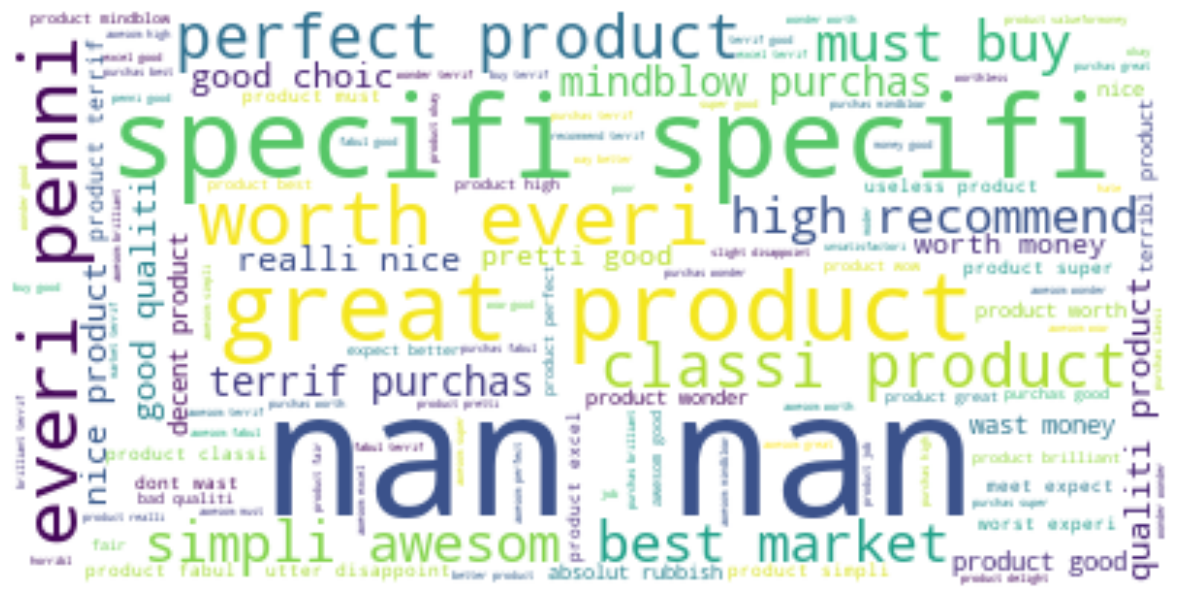

In [7]:
text = " ".join(i for i in data.Review)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

- Now I will analyze the sentiments of Flipkart reviews by adding three columns in this dataset as Positive, Negative, and Neutral by calculating the sentiment scores of the reviews:

In [8]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Review"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Review"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Review"]]
data = data[["Review", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
            Review  Positive  Negative  Neutral
0            super       1.0     0.000    0.000
1           awesom       0.0     0.000    1.000
2             fair       1.0     0.000    0.000
3  useless product       0.0     0.737    0.263
4             fair       1.0     0.000    0.000


- Now let’s see how most of the reviewers think about the products and services of Flipkart:



In [9]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


- So most of the reviews are neutral. Let’s have a look at the total of Positive, Negative, and Neutral sentiment scores to find a conclusion about Flipkart reviews:

In [10]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  76412.76899997835
Negative:  7704.235999999504
Neutral:  120927.99799999218


# Conclusion

- So, most people give Neutral reviews, and a small proportion of people give Negative reviews. So we can say that people are satisfied with Flipkart products and services.